IA & Data science (LU3IN0226) -- 2020-2021
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Edoardo Sarti, Olivier Schwander.*


# Premier bilan: classifieurs statistiques

Le but de ce notebook est de faire le point sur les premiers classifieurs qui ont été vus depuis le début du semestre.


**<font color="RED">Remarque: dans ce notebook, les sorties attendues des boîtes ont été supprimées, vous pouvez vous y référer dans le fichier HTML fourni. </font>**



## Travail à faire
Ce notebook est divisé en 2 parties. 
1. la partie "Mise en place" : ce sont les premières boîtes de ce notebook, elles servent à vérifier que vos classifieurs fonctionnent.
2. la partie "Expérimentations" : cette partie est libre, vous pouvez la compléter comme vous le souhaitez

## Rendu et exposé en semaine 9
Ce notebook est à rendre, sur Moodle, <font color="RED">**le mardi 6 avril à 16h au plus tard**</font> quel que soit votre groupe. 

Ce qui est à rendre:
1. ce notebook
2. votre fichier `Classifiers.py`
3. votre fichier `utils.py`

Les 3 fichiers doivent être mis dans un fichier archive (zip ou tar.gz ou tgz) : cette archive est remise sur le site Moodle : une archive par binôme (un seul membre soumet pour les 2).

Lors de la séance de TDTME de la semaine 9 de votre groupe, un exposé de 10mn sera fait par chaque binôme afin de présenter le travail réalisé.

Ce travail (compte-rendu et exposé) sera noté sur 10 et comptera pour 10% de la note finale d'UE.

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Ung Thierry

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>bilan-1</tt> et rajouter à la suite de <tt>bilan-1</tt> les noms des membres du binômes séparés par un tiret.

Par exemple, pour le binôme Luke Skywalker et Han Solo, le nom de fichier devient `bilan-1-Skywalker-Solo`

Penser à sauvegarder fréquemment le fichier en cours de travail :
- soit en cliquant sur l'icône "disquette"
- soit par la combinaison de touches [Ctrl]-S

In [1]:
# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

In [2]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import pickle as pkl
%matplotlib inline  

In [3]:
# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut


In [4]:
# Importation du package seaborn:
import seaborn as sns

In [5]:
# Graine pour les tirages aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# 1. Mise en place

## Données jouet

Pour être sûr d'avoir un modèle assez constant, on prend un problème très simple, c'est-à-dire un problème où les distribution des classes des données d'apprentissage sont très bien séparées. Pour cela, il suffit de générer des données selon des gaussiennes très écartées.

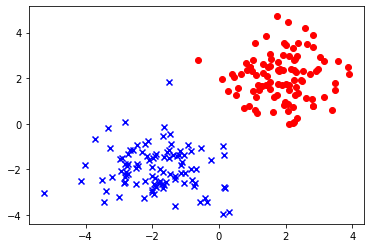

In [6]:
# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

# générer des données gaussienne 2D

N = 100
X,Y =  ut.genere_dataset_gaussian([-2,-2],[[1,0],[0,1]], [2,2],[[1,0],[0,1]],N)

ut.plot2DSet(X,Y)

# remarque: dans votre fonction plot2DSet() rajouter la ligne suivante:
# plt.grid(True)
# afin d'avoir l'affichage d'une grille pour les valeurs des axes

Pour vérifier que les valeurs sont les mêmes pour les 5 premiers exemples:

In [7]:
# Exemples de la classe +1
X[Y==+1][0:5,:]

array([[-1.64221264, -1.43921547],
       [-0.91694876, -0.94619795],
       [-3.37766937, -2.93782504],
       [-1.48496473, -1.48621405],
       [-1.48495231,  1.85273149]])

In [8]:
# Exemples de la classe -1
X[Y==-1][0:5,:]

array([[2.49671415, 1.8617357 ],
       [2.64768854, 3.52302986],
       [1.76584663, 1.76586304],
       [3.57921282, 2.76743473],
       [1.53052561, 2.54256004]])

<font color="RED" size="+1">[Q]</font> Avant d'appliquer un classifieur, proposer une droite, passant par l'origine, et permettant de séparer les exemples des 2 classes.

Une fois votre droite trouvée, comme elle passe par le point $(0,0)$, elle vérifie donc l'équation $w_1 x_1+w_2 x_2 =0$, calculer (à la main) les valeurs de $w_1$ et $w_2$ pour cette droite.

<font color="RED" size="+1">[R]</font> On prend la droite passant par les points (0,0) et (1,-1) afin de séparer les exemples des 2 classes.

De ce fait, on a x + y = 0 donc :
x + y = (w1 * x1) + (w2 * x2) => w1 = 1 et w2 = -1.

Il s'agit de la droite d'équation y = -x.

##  Algorithme des $k$ plus proches voisins


Accuracy pour k=1:  1.0


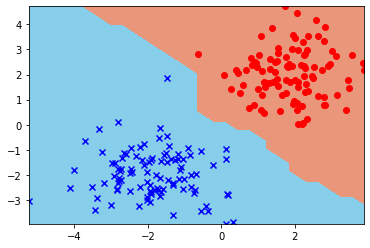

In [9]:
# Création d'un knn avec k=1 et 2 dimensions pour les données
classifierKNN = classif.ClassifierKNN(2,1)

# Entraînement du classifier:
classifierKNN.train(X,Y)

# Affichage de la frontière de séparation des classes
ut.plot_frontiere(X,Y,classifierKNN)
ut.plot2DSet(X,Y)

# Performance de ce classifieur:
print("Accuracy pour k=1: ",classifierKNN.accuracy(X,Y))

Accuracy pour k=5:  0.995


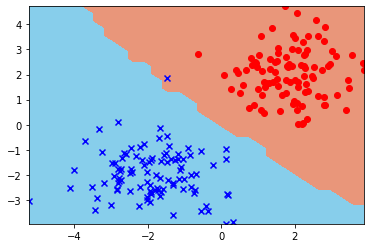

In [10]:
# Création d'un knn avec k=1 et 2 dimensions pour les données
classifierKNN5 = classif.ClassifierKNN(2,5)

# Entraînement du classifier:
classifierKNN5.train(X,Y)

# Affichage de la frontière de séparation des classes
ut.plot_frontiere(X,Y,classifierKNN5)
ut.plot2DSet(X,Y)

# Performance de ce classifieur:
print("Accuracy pour k=5: ",classifierKNN5.accuracy(X,Y))

<font color="RED" size="+1">[Q]</font> Combien d'exemples sont mal classés par l'algorithme des kppv quand $k$ vaut 5? Pourquoi sont-ils mal classés ? Vérifiez "à la main" que le résultat est correct en ce qui les concerne.

<font color="RED" size="+1">[R]</font> Le nombre de points mal classés par l'algorithme des kppv quand k vaut 5 est de 1. Ce point est mal classé puisque parmi ses 5 plus proches points voisins, la majorité de ces points ne font pas partie de sa classe. Il s'agit du point bleu dans la partie rouge de la frontière dans l'affichage.

On peut vérifier à la main grace au code en-dessous que le résultat est correct en qui concerne ce point en vérifiant le label de ses 5 plus proches voisins.

In [11]:
# On cherche ce point (on vérifie si il est mal classé)
x = None
for p in range(len(classifierKNN5.desc_set)) :
    if (classifierKNN5.score(classifierKNN5.desc_set[p]) != classifierKNN5.label_set[p]) :
        x = classifierKNN5.desc_set[p]

# On calcule les distance de x au reste des points
distances_x = []
index = []
for k in range(len(classifierKNN5.desc_set)) :
    distances_x.append(classifierKNN5.distance(x, classifierKNN5.desc_set[k]))
    index.append(k)

# On zip les listes
new_tab = list(zip(distances_x, index))
new_tab.sort(key = lambda i: i[0])

# On affiche le label des 5 plus proches voisins de x
ppv = []
for i in range(1, 6) :
    ppv.append(new_tab[i][1])
print("Le label des 5 plus proches voisins du point mal classés sont :\n", classifierKNN5.label_set[ppv])

Le label des 5 plus proches voisins du point mal classés sont :
 [-1 -1 -1 -1 -1]


##  Perceptron de Rosenblatt

Information sur le perceptron implémenté qui a été utilisé par la suite dans ce notebook:
- initialisation des poids : mis à 0
- méthode train: un seul parcours de tous le training set en prenant les exemples dans un ordre aléatoire (généré par shuffle)
- mise à jour des poids dans le train: à chaque mauvaise classification, version du TME3, une mauvaise classification se produit quand la prédiction n'est pas la classe de l'exemple.


<font color="RED" size="+1">ATTENTION !</font> L'algorithme du perceptron que l'on a vu peut être implémenté de différentes manières, il se peut donc que vous ne trouviez pas **exactement** les mêmes valeurs que celles qui sont indiquées en résultat dans les boîtes qui suivent. Cela peut être normal !

### Essai avec un learning rate faible

<font color="RED" size="+1">[Q]</font> Avant de réaliser les expérimentations suivantes, rajouter dans la classe `ClassifieurPerceptron` un accesseur pour le vecteur de poids courant du classifieur:

Accuracy du perceptron ( 0.001 ) après 1 train:  1.0
Vecteur de poids trouvé:  [-0.00303844 -0.00100367]


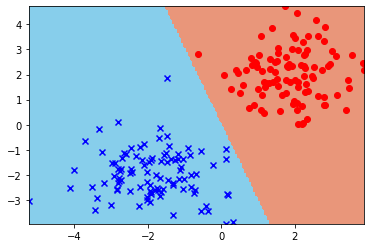

In [12]:
# Choix du learning rate
learning_rate = 1e-3

# Graine pour les tirages aléatoires :
np.random.seed(42)  

# Création d'un perceptron
perceptronV0 = classif.ClassifierPerceptron(2, learning_rate)

# Entraînement du classifier:
perceptronV0.train(X,Y)

# Affichage de la frontière de séparation des classes
# On augmente la qualité du tracé en prenant un step élevé:
ut.plot_frontiere(X,Y,perceptronV0,step=150)
ut.plot2DSet(X,Y)

# Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,") après 1 train: ",perceptronV0.accuracy(X,Y))
print("Vecteur de poids trouvé: ", perceptronV0.getW())

<font color="RED" size="+1">[Q]</font> Comparer le vecteur de poids trouvé par votre classifieur avec les poids de la droite que vous aviez proposés. Qu'en pensez-vous ?

<font color="RED" size="+1">[R]</font> On a comme droite d'équation y = -x, soit x + y = 0.
<br/>On remarque que la droite correspond à peu près avec celle affichée lors de l'affichage de la frontière.

On décide de réaliser plusieurs fois l'apprentissage du perceptron:

Accuracy du perceptron ( 0.001 ) après les 11 train:  1.0
Vecteur de poids trouvé:  [-0.00303844 -0.00100367]


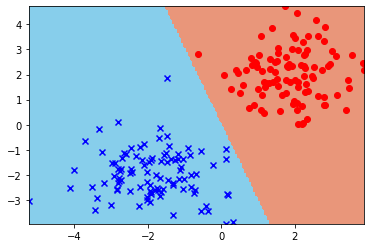

In [13]:
# Graine pour les tirages aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# on rajoute 10 appels de train après le train de la boîte précédente:
for i in range(0,100):
    perceptronV0.train(X,Y)
    
# Affichage de la frontière de séparation des classes
ut.plot_frontiere(X,Y,perceptronV0,step=150)
ut.plot2DSet(X,Y)

# Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,") après les 11 train: ",perceptronV0.accuracy(X,Y))  
print("Vecteur de poids trouvé: ", perceptronV0.getW())

<font color="RED" size="+1">[Q]</font> Que constate-t-on sur le vecteur des poids ? Est-ce normal ? Expliquez.

<font color="RED" size="+1">[R]</font> On remarque les valeurs du vecteur des poids ne change pas puisque la forme de la frontière ne change pas (il y a une différence mais elle n'est pas flagrante).
<br/>Cela s'explique du fait qu'après la première utilisation de train, la majorité, voire l'ensemble, des points se retrouvent bien classés, soit w * score(x) * y > 0, et qu'il n y a plus de mises à jour des poids.

## Affichage de l'évolution du coût (cf. TME4)


Accuracy du perceptron ( 0.001 ):  1.0
Vecteur de poids final trouvé:  [-0.00303844 -0.00100367]


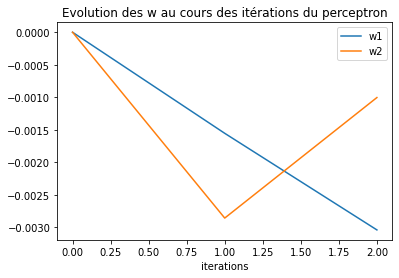

In [14]:
# Choix du learning rate
learning_rate = 1e-3

# Graine pour les tirages aléatoires :
np.random.seed(42)  

# Création et entraînement du perceptron sur les données générées
# On utilise la mémorisation de l'historique des poids comme vu en TME 4
perceptronV1 = classif.ClassifierPerceptron(2, learning_rate, history=True)

# on réalise 10 appels de train:
for i in range(0,10):
    perceptronV1.train(X,Y)

# récupération de l'évolution des w au cours de l'apprentissage 
allw = np.array(perceptronV1.allw) # si allw est sous forme de liste

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

# Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,"): ",perceptronV1.accuracy(X,Y)) 
print("Vecteur de poids final trouvé: ", perceptronV1.getW())

On va faire la même chose mais cette fois-ci, on utilise la version du Perceptron avec biais implémentée lors du TME 4 : c'est-à-dire une version où les points ne sont considérés bien classés que dans le cas où $f(\mathbf x_i) y_i>1$ (cela influence donc sur la mise à jour des poids).


Accuracy du perceptron ( 0.001 ):  1.0
Nombre de mises à jour des poids:  5029


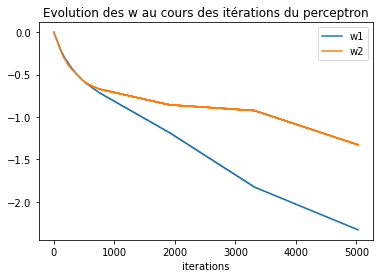

In [15]:
np.random.seed(42)   # on prend 42 comme graine

learning_rate =1e-3

# Création et entraînement du perceptron sur les données générées
perceptronV2b = classif.ClassifierPerceptronBiais(2, learning_rate, history=True)

# on rajoute 10 appels de train après le train de la boîte précédente:
for i in range(0,5000):
    perceptronV2b.train(X,Y)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
allw = np.array(perceptronV2b.allw) # si allw est sous forme de liste

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

# Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,"): ",perceptronV2b.accuracy(X,Y))  
print("Nombre de mises à jour des poids: ",len(allw))

Accuracy du perceptron ( 0.001 ) après les 11 train:  0.995
Vecteur de poids trouvé:  [-0.74456116 -0.68265125]


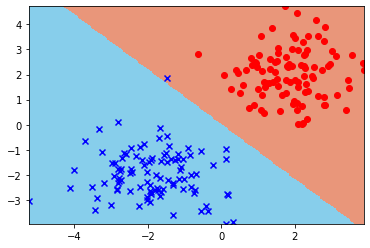

In [16]:
# Changement du learning rate : on le prend très grand !
learning_rate = 1e-3

# Graine pour les tirages aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# Création d'un perceptron
perceptronV2 = classif.ClassifierPerceptronBiais(2,learning_rate,history=True)

# on rajoute 100 appels de train:
for i in range(0,100):
    perceptronV2.train(X,Y)
    
# Affichage de la frontière de séparation des classes
ut.plot_frontiere(X,Y,perceptronV2,step=150)
ut.plot2DSet(X,Y)

# Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,") après les 11 train: ",perceptronV2.accuracy(X,Y))  
print("Vecteur de poids trouvé: ", perceptronV2.getW())

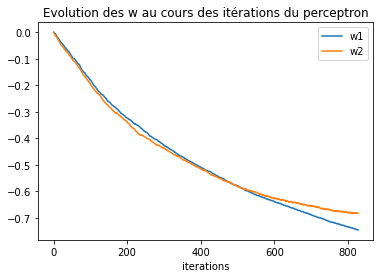

In [17]:
# récupération de l'évolution des w au cours de l'apprentissage 
allw = np.array(perceptronV2.allw) # si allw est sous forme de liste

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])


## Cross-validation

Si ce n'est pas déjà encore fait, pensez à rajouter les fonctions `crossval` et `crossval_strat` écrites au TME 4 dans le fichier `utils.py` de votre librairie `iads`.


In [18]:
# Changement du learning rate : on le prend très grand !
learning_rate = 1e-3

# Graine pour les tirages aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

niter = 10 
perf = []

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(X, Y, niter, i)
    cl = classif.ClassifierPerceptronBiais(2,learning_rate)
    for j in range(0,10):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)
print(f'\nRésultat global:\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  180  |Ytest|=  20 	perf=  0.95
Apprentissage  2 :	  |Yapp|=  180  |Ytest|=  20 	perf=  1.0
Apprentissage  3 :	  |Yapp|=  180  |Ytest|=  20 	perf=  1.0
Apprentissage  4 :	  |Yapp|=  180  |Ytest|=  20 	perf=  1.0
Apprentissage  5 :	  |Yapp|=  180  |Ytest|=  20 	perf=  1.0
Apprentissage  6 :	  |Yapp|=  180  |Ytest|=  20 	perf=  1.0
Apprentissage  7 :	  |Yapp|=  180  |Ytest|=  20 	perf=  1.0
Apprentissage  8 :	  |Yapp|=  180  |Ytest|=  20 	perf=  1.0
Apprentissage  9 :	  |Yapp|=  180  |Ytest|=  20 	perf=  1.0
Apprentissage  10 :	  |Yapp|=  180  |Ytest|=  20 	perf=  1.0

Résultat global:	moyenne= 0.995	écart-type= 0.015


## Données plus compliquées

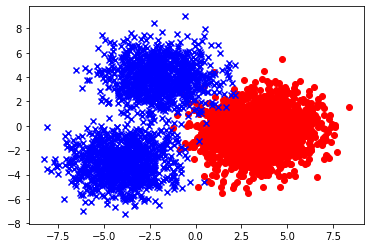

In [19]:
# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

# générer des données gaussienne 2D

N = 1000
X1,Y1 =  ut.genere_dataset_gaussian([-4,-3],[[2,0],[0,2]], [4,0],[[2,0],[0,2]],N)
X2,Y2 =  ut.genere_dataset_gaussian([-2,4],[[2,0],[0,2]], [3,-1],[[2,0],[0,2]],N)

Xdur = np.concatenate((X1,X2))
Ydur = np.concatenate((Y1,Y2))

ut.plot2DSet(Xdur,Ydur)


In [20]:
# On va utiliser un chronomètre pour avoir le temps d'exécution :
import timeit


In [21]:
# Changement du learning rate : on le prend très grand !
learning_rate = 1e-3

# Graine pour les tirages aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

niter = 10 
perf = []

nb_train = 20 # Nombre de lancement de la fonction train()

tic = timeit.default_timer() # heure de départ

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xdur, Ydur, niter, i)
    cl = classif.ClassifierPerceptronBiais(2,learning_rate)
    for j in range(0,nb_train):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])
    
toc = timeit.default_timer() # heure d'arrivée

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)

print(f'\nTemps mis: PerceptronBiais avec nb_train= {nb_train} --> {toc-tic:.5f} secondes')
print(f'Résultat global:\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.985
Apprentissage  2 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.995
Apprentissage  3 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9925
Apprentissage  4 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.995
Apprentissage  5 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9875
Apprentissage  6 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9725
Apprentissage  7 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9825
Apprentissage  8 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9825
Apprentissage  9 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9725
Apprentissage  10 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.98

Temps mis: PerceptronBiais avec nb_train= 20 --> 2.36369 secondes
Résultat global:	moyenne= 0.985	écart-type= 0.008


In [22]:
# Graine pour les tirages aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

niter = 10 
perf = []

val_k = 7 # valeur de k

tic = timeit.default_timer() # heure de départ

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xdur, Ydur, niter, i)
    cl = classif.ClassifierKNN(2,val_k)
    for j in range(0,nb_train):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

toc = timeit.default_timer() # heure d'arrivée

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)

print(f'\nTemps mis: KNN avec k= {val_k} --> {toc-tic:.5f} secondes')
print(f'Résultat global:\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.99
Apprentissage  2 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9975
Apprentissage  3 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9925
Apprentissage  4 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9925
Apprentissage  5 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.985
Apprentissage  6 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.99
Apprentissage  7 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9925
Apprentissage  8 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9875
Apprentissage  9 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9925
Apprentissage  10 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  0.9825

Temps mis: KNN avec k= 7 --> 68.88743 secondes
Résultat global:	moyenne= 0.990	écart-type= 0.004


# Données multiclasses


Pour générer des données multiclasses, une façon très simple est d'utiliser le générateur de données gaussienne et de réétiquetter les classes des exemples.

Par exemple:

In [23]:
# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

# générer des données gaussienne 2D et réétiquetter
N = 100

X1,Y1 =  ut.genere_dataset_gaussian([-3,-3],[[1,0],[0,1]], [3,-3],[[1,0],[0,1]],N)
Y1[Y1==-1]= 0
# Y1[Y1==+1]= 1 # Inutile...

X2,Y2 =  ut.genere_dataset_gaussian([-3,3],[[1,0],[0,1]], [3,3],[[1,0],[0,1]],N)
Y2[Y2==-1]= 2
Y2[Y2==+1]= 3

Xmulti = np.concatenate((X1,X2))
Ymulti = np.concatenate((Y1,Y2))



<font color="RED" size="+1">[Q]</font> En vous inspirant de votre fonction `plot2DSet`, écrire la fonction `plot2DSetMulticlass` qui permet d'afficher les exemples étiquettés en plusieurs classes.

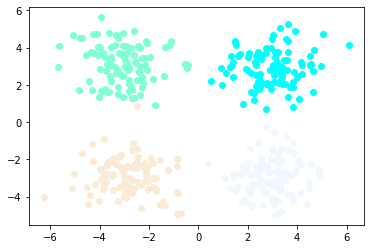

In [24]:
# Par exemple :
ut.plot2DSetMulticlass(Xmulti,Ymulti)

In [25]:
# Exemples de la classe 0
Xmulti[Ymulti==0][0:5,:]

array([[ 3.49671415, -3.1382643 ],
       [ 3.64768854, -1.47697014],
       [ 2.76584663, -3.23413696],
       [ 4.57921282, -2.23256527],
       [ 2.53052561, -2.45743996]])

In [26]:
# Exemples de la classe 1
Xmulti[Ymulti==1][0:5,:]

array([[-2.64221264, -2.43921547],
       [-1.91694876, -1.94619795],
       [-4.37766937, -3.93782504],
       [-2.48496473, -2.48621405],
       [-2.48495231,  0.85273149]])

In [27]:
# Exemples de la classe 2
Xmulti[Ymulti==2][0:5,:]

array([[1.40557234, 2.40062498],
       [3.0052437 , 3.04698059],
       [2.54993453, 3.62284993],
       [1.93237957, 2.85762051],
       [3.12029563, 3.51443883]])

In [28]:
# Exemples de la classe 3
Xmulti[Ymulti==3][0:5,:]

array([[-2.24301138,  2.07783468],
       [-2.13039408,  4.35563786],
       [-2.5865651 ,  4.87679581],
       [-3.7737892 ,  1.7553453 ],
       [-4.77872025,  4.49604431]])

In [29]:
# Changement du learning rate : on le prend très grand !
learning_rate = 1e-3

# Graine pour les tirages aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# Création d'un perceptron
perceptronV3 = classif.ClassifierPerceptronBiais(2,learning_rate)

perceptmulti = classif.ClassifierMultiOAA(perceptronV3)



In [30]:
perceptmulti.train(Xmulti,Ymulti)
print("Accuracy globale: ",perceptmulti.accuracy(Xmulti,Ymulti))
    

Accuracy globale:  0.9975


In [31]:
for i in range(0,5):
    print(i+1,": (",Ymulti[i],") --> ",perceptmulti.predict(Xmulti[i,:]), "(",perceptmulti.score(Xmulti[i,:]),")")

1 : ( 0 ) -->  0 ( [1.4843744652191428, -0.0032715329414116923, 0.20883093149360654, -1.528281318015313] )
2 : ( 0 ) -->  0 ( [1.1405658179036835, -0.43491294214703313, 0.6159900151604498, -1.1867029671333227] )
3 : ( 0 ) -->  0 ( [1.344790992826597, 0.177961730367462, -0.0014098705320311211, -1.3793806398601984] )
4 : ( 0 ) -->  0 ( [1.517742379988568, -0.4551017234597937, 0.6894464583758992, -1.5755912880734617] )
5 : ( 0 ) -->  0 ( [1.1165194045656952, 0.04237717679461128, 0.10984247044335937, -1.148259517482383] )


In [32]:
# Changement du learning rate : on le prend très grand !
learning_rate = 1e-3

# Graine pour les tirages aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# Création d'un KNN
kppvMC = classif.ClassifierKNN(2,3)

kppvMulti = classif.ClassifierMultiOAA(kppvMC)



In [33]:
kppvMulti.train(Xmulti,Ymulti)
print("Accuracy globale: ",kppvMulti.accuracy(Xmulti,Ymulti))


Accuracy globale:  0.9975


Pour avoir un affichage de la frontière de séparation des classes, il faut une version de la fonction `plot_frontiere` qui soit capable de traiter plusieurs classes, que l'on considère égales à 0, 1, 2, 3,...

In [34]:
def plot_frontiere_multiclass(desc_set, label_set, classifier, step=30):
    """ desc_set * label_set * Classifier * int -> NoneType
        Remarque: le 4e argument est optionnel et donne la "résolution" du tracé
        affiche la frontière de décision associée au classifieur
        cette version reconnaît jusqu'à 4 classes (notée: 0, 1, 2 et 3)
    """
    mmax=desc_set.max(0)
    mmin=desc_set.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    # colors[0] est la couleur des -1 et colors[1] est la couleur des +1
    plt.contourf(x1grid,x2grid,res,colors=["darksalmon",'skyblue','#FFDF9E','#B1FB17'],levels=[-1,0,1,2,3,4])    


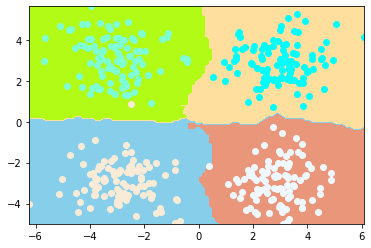

In [35]:
# Affichage de la frontière de séparation des classes
plot_frontiere_multiclass(Xmulti,Ymulti,kppvMulti,step=100)
ut.plot2DSetMulticlass(Xmulti,Ymulti)


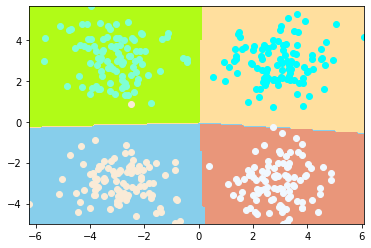

In [36]:
# Affichage de la frontière de séparation des classes
plot_frontiere_multiclass(Xmulti,Ymulti,perceptmulti,step=150)
ut.plot2DSetMulticlass(Xmulti,Ymulti)


In [37]:
# Changement du learning rate : on le prend très grand !
learning_rate = 1e-3

# Graine pour les tirages aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

niter = 10 
perf = []

tic = timeit.default_timer() # heure de départ
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xmulti, Ymulti, niter, i)
    cl = classif.ClassifierMultiOAA(classif.ClassifierPerceptronBiais(2,learning_rate))
    cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])
toc = timeit.default_timer() # heure d'arrivée

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)

print(f'\nTemps mis: --> {toc-tic:.5f} secondes')
print(f'Résultat global:\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  360  |Ytest|=  40 	perf=  1.0
Apprentissage  2 :	  |Yapp|=  360  |Ytest|=  40 	perf=  0.975
Apprentissage  3 :	  |Yapp|=  360  |Ytest|=  40 	perf=  1.0
Apprentissage  4 :	  |Yapp|=  360  |Ytest|=  40 	perf=  0.975
Apprentissage  5 :	  |Yapp|=  360  |Ytest|=  40 	perf=  1.0
Apprentissage  6 :	  |Yapp|=  360  |Ytest|=  40 	perf=  0.925
Apprentissage  7 :	  |Yapp|=  360  |Ytest|=  40 	perf=  0.975
Apprentissage  8 :	  |Yapp|=  360  |Ytest|=  40 	perf=  0.975
Apprentissage  9 :	  |Yapp|=  360  |Ytest|=  40 	perf=  1.0
Apprentissage  10 :	  |Yapp|=  360  |Ytest|=  40 	perf=  0.975

Temps mis: --> 0.12872 secondes
Résultat global:	moyenne= 0.980	écart-type= 0.022


# 2. Expérimentations 


Compléter ce notebook avec des expérimentations permettant de réaliser une comparaison des algorithmes que vous avez implémentés (kppv, perceptron, kernel perceptron, adaline) sur un jeu de données réelles.


On va d'abord présenter les algorithmes n'ayant pas été présentés lors de la partie précèdente:
<br/> - classifieur Adaline
<br/> - classifieur Adaline2 (analytique)
<br/> - algorithme crossval (non stratifié)

# 2.1. Présentation

### **Classifieur Adaline**

In [38]:
# Selection d'une seed aléatoire
np.random.seed()

# Génération rapide d'un jeu de données 2D:
N = 100
X,Y =  ut.genere_dataset_gaussian([-2,-2],[[1,0],[0,1]], [2,2],[[1,0],[0,1]],N)

Accuracy du perceptron ( 0.001 ) après 1 train:  1.0
Vecteur de poids trouvé:  [[-0.29675122 -0.15618311]]


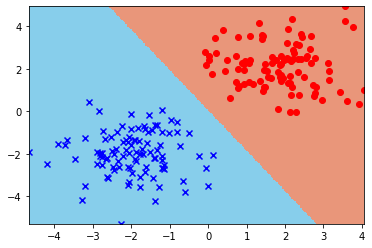

In [39]:
# On crée un perceptron Adaline allant étudier ce jeu de données sur 1 itération de train
learning_rate = 1e-3
adaline = classif.ClassifierADALINE(2, learning_rate, history=True)

t = 1
for i in range(t) :
    adaline.train(X, Y)

print("Accuracy du perceptron (", learning_rate,") après", t, "train: ", adaline.accuracy(X,Y))  
print("Vecteur de poids trouvé: ", adaline.getW())

ut.plot_frontiere(X,Y,adaline,step=150)
ut.plot2DSet(X,Y)

Accuracy du perceptron ( 0.001 ) après 100 train:  1.0
Vecteur de poids trouvé:  [[-0.22905636 -0.21506853]]


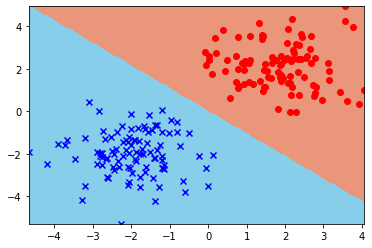

In [40]:
# On crée un perceptron Adaline allant étudier ce jeu de données sur 100 itérations de train
learning_rate = 1e-3
adaline = classif.ClassifierADALINE(2, learning_rate, history=True)

t = 100
for i in range(t) :
    adaline.train(X, Y)

print("Accuracy du perceptron (", learning_rate,") après", t, "train: ", adaline.accuracy(X,Y))  
print("Vecteur de poids trouvé: ", adaline.getW())

ut.plot_frontiere(X,Y,adaline,step=150)
ut.plot2DSet(X,Y)

### **PerceptronAdaline2 (analytique)**

Accuracy du perceptron:  1.0
Vecteur de poids trouvé:  [-0.24580896 -0.21064993]


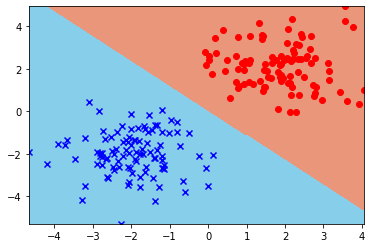

In [41]:
# On crée un perceptron Adaline allant étudier ce jeu de données
adaline2 = classif.ClassifierADALINE2(2)

# On ne peut train que une seule fois un PerceptronAdaline2 (le résultat sera toujours le meme)
adaline2.train(X, Y)

print("Accuracy du perceptron: ", adaline2.accuracy(X,Y))
print("Vecteur de poids trouvé: ", adaline2.getW())

ut.plot_frontiere(X, Y, adaline2, step=150)
ut.plot2DSet(X, Y)

Un des forces principales du classifieur ADALINE analytique est que l'entrainement de ce dernier est unique. On peut entrainer autant de fois que l'on souhaite un classifieur de ce genre, le résultat obtenu restera toujours le meme.

### **Crossval (non-stratifié)**

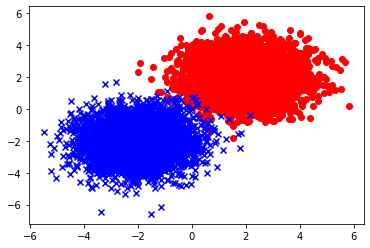

In [42]:
# Selection d'une seed aléatoire
np.random.seed()

# Génération rapide d'un jeu de données 2D de grande taille
N = 5000
X,Y =  ut.genere_dataset_gaussian([-2,-2],[[1,0],[0,1]], [2,2],[[1,0],[0,1]],N)

# On affiche la répartition des points
ut.plot2DSet(X, Y)

In [43]:
niter = 10 
perf = []

# On utilise dans un premier temps crossval
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval(X, Y, niter, i)
    cl = classif.ClassifierPerceptron(2,learning_rate)
    for j in range(0,10):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)
print(f'\nRésultat global avec crossval :\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')
print("\n\n")

niter = 10
perf = []

# On utilise désormais crossval_strat afin de les comparer
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(X, Y, niter, i)
    cl = classif.ClassifierPerceptron(2,learning_rate)
    for j in range(0,10):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)
print(f'\nRésultat global avec crossval_strat :\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.999
Apprentissage  2 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.997
Apprentissage  3 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.996
Apprentissage  4 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.997
Apprentissage  5 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.999
Apprentissage  6 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.997
Apprentissage  7 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.999
Apprentissage  8 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.997
Apprentissage  9 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.985
Apprentissage  10 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.995

Résultat global avec crossval :	moyenne= 0.996	écart-type= 0.004



Apprentissage  1 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  1.0
Apprentissage  2 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.997
Apprentissage  3 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.997
Apprentissage  4 :	  |Yapp|=  9000  |Ytest|=  1000 	perf=  0.999
Apprentissage  5 :	  |

On remarque que la validation croisée stratifiée permet une meilleure performance en terme de précision.
<br/>On explique cela du fait que l'apprentissage du Classifieur lors de cette dernière est realisé avec autant de valeurs de chaque classe du dataset (soit autant de +1 que de -1 dans notre cas).
<br/>Lors de la validation croisée non-stratifiée, le Classifieur n'est pas soumis à cette condition et les valeurs d'apprentissage sont donc sélectionnées sans discrimination.
<br/>(Le Classifieur utilisé est le Perceptron basique)

# 2.2. Comparaisons sur données

Afin de comparer les performances de mes algorithmes de classifieurs, je vais les utiliser sur les données du fichier '**usps.pkl**' du TME2 afin de pouvoir comparer leurs performances.
<br/>Les comparaisons seront réalisées à l'aide du classifieur multi-classes en raison du nombre important de classes dans ces données.

Les dimensions de X sont: (6229, 256)


(array([1065.,  857.,  618.,  564.,  546.,  472.,  573.,  510.,  484.,
         540.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

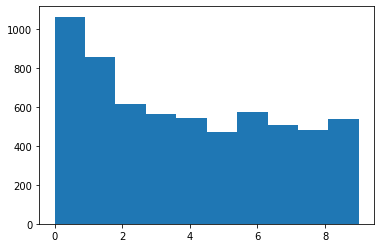

In [44]:
import pickle as pkl

data = pkl.load(open('data/usps.pkl', 'rb'))
X = np.array(data['X_train'], dtype=float)
Y = np.array(data['Y_train'], dtype=float)

print("Les dimensions de X sont:", X.shape)
plt.hist(Y)

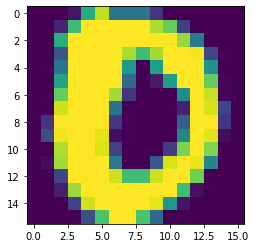

In [45]:
# On affiche l'image
plt.imshow(np.reshape(X[0], (16,16)))

In [46]:
import copy
def calcul_efficacite(classif, X, Y):
    
    # Parametres
    niter = 10 # Nombre d'itération
    perf = [] # Liste des performances des algos

    # Temps de départ
    startTime = timeit.default_timer()
    
    # Boucle principale
    for i in range(niter):
        Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(X, Y, niter, i)
        classif_en_cours = copy.deepcopy(classif)
        for j in range(5):
            classif_en_cours.train(Xapp, Yapp)
        perf.append(classif_en_cours.accuracy(Xtest, Ytest))
        print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])
        
    # Temps de fin
    endTime = timeit.default_timer()

    # On transforme la liste en array numpy pour avoir les fonctions statistiques:
    perf = np.array(perf)

    # Affichage
    print(f'\nTemps mis: --> {endTime - startTime:.5f} secondes')
    print(f'Résultat global:\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

In [47]:
# Paramètres
learning_rate = 1e-3

In [48]:
calcul_efficacite(classif.ClassifierMultiOAA(classif.ClassifierPerceptron(X.shape[1], learning_rate)), X, Y)

Apprentissage  1 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9035369774919614
Apprentissage  2 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.8922829581993569
Apprentissage  3 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.8408360128617364
Apprentissage  4 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.8987138263665595
Apprentissage  5 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.8906752411575563
Apprentissage  6 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9180064308681672
Apprentissage  7 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.8585209003215434
Apprentissage  8 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9019292604501608
Apprentissage  9 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.8681672025723473
Apprentissage  10 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9035369774919614

Temps mis: --> 8.82498 secondes
Résultat global:	moyenne= 0.888	écart-type= 0.023


In [49]:
calcul_efficacite(classif.ClassifierMultiOAA(classif.ClassifierPerceptronBiais(X.shape[1], learning_rate)), X, Y)

Apprentissage  1 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9147909967845659
Apprentissage  2 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9067524115755627
Apprentissage  3 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.932475884244373
Apprentissage  4 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9147909967845659
Apprentissage  5 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9163987138263665
Apprentissage  6 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9228295819935691
Apprentissage  7 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9131832797427653
Apprentissage  8 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9196141479099679
Apprentissage  9 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.8971061093247589
Apprentissage  10 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9228295819935691

Temps mis: --> 10.34653 secondes
Résultat global:	moyenne= 0.916	écart-type= 0.009


In [50]:
calcul_efficacite(classif.ClassifierMultiOAA(classif.ClassifierADALINE(X.shape[1], learning_rate)), X, Y)

Apprentissage  1 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.18006430868167203
Apprentissage  2 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.18488745980707397
Apprentissage  3 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.27813504823151125
Apprentissage  4 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.24758842443729903
Apprentissage  5 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.18971061093247588
Apprentissage  6 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.21543408360128619
Apprentissage  7 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.2491961414790997
Apprentissage  8 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.27009646302250806
Apprentissage  9 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.21382636655948553
Apprentissage  10 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.20096463022508038

Temps mis: --> 7.77273 secondes
Résultat global:	moyenne= 0.223	écart-type= 0.034


In [51]:
calcul_efficacite(classif.ClassifierMultiOAA(classif.ClassifierADALINE2(X.shape[1])), X, Y)

Apprentissage  1 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.909967845659164
Apprentissage  2 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.8745980707395499
Apprentissage  3 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9131832797427653
Apprentissage  4 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.8971061093247589
Apprentissage  5 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.8954983922829582
Apprentissage  6 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9180064308681672
Apprentissage  7 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9019292604501608
Apprentissage  8 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.8858520900321544
Apprentissage  9 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.864951768488746
Apprentissage  10 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.8954983922829582

Temps mis: --> 10.51570 secondes
Résultat global:	moyenne= 0.896	écart-type= 0.016


In [52]:
calcul_efficacite(classif.ClassifierMultiOAA(classif.ClassifierKNN(X.shape[1], 5)), X, Y)

Apprentissage  1 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9694533762057878
Apprentissage  2 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9485530546623794
Apprentissage  3 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9630225080385852
Apprentissage  4 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9533762057877814
Apprentissage  5 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9646302250803859
Apprentissage  6 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9662379421221865
Apprentissage  7 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9630225080385852
Apprentissage  8 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9565916398713826
Apprentissage  9 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9372990353697749
Apprentissage  10 :	  |Yapp|=  5607  |Ytest|=  622 	perf=  0.9630225080385852

Temps mis: --> 2013.31938 secondes
Résultat global:	moyenne= 0.959	écart-type= 0.009


### **Résultats des comparaisons**

Parmi les classifieurs utilisés, on remarque 4 classifieurs dont les résultats sont conformes aux attentes et 1 classifieur dont les résultats sont anormaux.

Pour les classifieurs aux résultats corrects, on retrouve :
<br/> - classifieur Perceptron
<br/> - classifieur PerceptronBiais
<br/> - classifieur Adaline2
<br/> - classifieur KNN

On a pour ces classifieurs, une précision moyenne grace à la validation croisée stratifiée aux alentours des 90%, ce qui signifie qu'uniquement 1/10 des points se retrouvent mal classés après apprentissage.
<br/> On remarque que le classifieur PerceptronBiais affiche un meilleur résultat (91.6% de précision) que le classifieur Perceptron classique (88.8% de précision). On explique cette difference du fait que l'entrainement du PerceptronBiais est plus rigoureux que celui du Perceptron, puisqu'il considère qu'un point n'est bien classé lors de l'apprentissage que lorsqu'il remplit la condition : **w * x * y > 1**.
<br/> Le classifieur Adaline2 (89.6% de précision) affichera toujours le meme résultat en raison de sa méthode d'apprentissage (calcul matriciel). 
<br/> Le classifieur KNN a une précision de 95.9% mais on remarque que l'éxécution a mis environ 30 min, ce qui est surement dù à des erreurs lors de l'implémentation de l'algorithme.

Pour le classifieur aux résultats anormaux, on retrouve :
<br/> - classifieur Adaline

La raison pour laquelle ce classifieur n'affiche pas des résultats convenables est surement lié à la manière dont il est codé.
<br/>Lors de l'étude de données à 2 classes, ce classifieur affiche des résultats de précision similaires aux 4 autres évoqués plus haut comme peuvent le montrer les résultats des tests lors de la partie 1 du bilan.
<br/> J'ai surement dù commettre des erreurs lors de l'implémentation de l'algorithme.